# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue"> Esercitazione Numerica 3 </span>

### Esercizio 03.1: Prezzamento di una "plain vanilla" 

Il contratto, nel contesto di un mercato finanziario idealizzato, è il derivato di un prodotto finanziario che, matematicamente, si esprime come funzione dell'evoluzione del prezzo del bene (*asset price*) $S(t)$. Gli agenti spesso sono stimolati a pattuire un contratto tre le parti per proteggersi da possibili perdite e prevenire gli eventuali rischi dovuti all'andamento imprevedibile dell'asset price nel mercato reale. 

In questa esercitazione numerica l'attenzione è rivolta ad un tipo di contratto detto **opzione** che coinvolge due partner tra i quali uno è vincolato ad assumersi un obbligo, il *writer*, mentre l'altro acquisisce un diritto, l'*owner*, che, solo al tempo di consegna fissato, deciderà se esercitare o meno. La più semplice di queste opzioni è quella **Europea**, detta anche **plain vanilla** per la sua struttura semplice e per la sua diffusione dovuta alla trattazione analitica che è stata ricavata risolvendo le equazioni differenziali stocastiche associate al processo che la modellizza. Il writer, che è il venditore dell'opzione, garantisce il diritto all'owner di comprare (**opzione call**) o di vendere (**opzione put**) un bene, con un attuale valore di mercato $S(t)$, ad un prezzo fissato $K$ (*strike price*) ad un ben definito istante temporale nel futuro $T$ (*expiry date*) che indica la data di chiusura del contratto. L'holder ha il diritto di decidere se rispettare o meno il contratto se alla sua chiusura ne potrà trarre un profitto. 

Un tale profitto vale ovvaimente:
- $max[0,S(T)-K]$ per la *call*
- $max[0,K-S(T)]$ per la *put*

Il writer, ovviamente, si impegna a firmare il contratto solo se gli viene "garantito" un compenso che rappresenta il prezzo adeguato dell'opzione. La valutazione di quest'ultimo costituisce il **prezzamento**, o il costo, dell'opzione che non sempre è possibile calcolare analiticamente (opzioni esotiche) e la cui determinazione richiede, nei casi meno banali, l'utilizzo di tecniche numeriche di simulazione Monte Carlo.

Queste ultime si basano sul campionamento, in maniera *esatta*, di processi stocastici dipendenti dal tempo quali il **Moto Browniano** e una sua variante, il **Moto Browniano Geometrico** introdotto per migliorare il tentativo iniziale, proposto da Bachelier ad inizio '900, di modellizzazione dell'andamento del prezzo di un bene in un mercato. 

Quindi ora la domanda importante da porsi è la seguente:  <span style="color:red"> "Quanto dovrebbe costare un'opzione?" </span>

Nel caso dell'opzione Europea è disponibile, unico caso finora risolto, una soluzione analitica del prezzamento, elaborata da Black e Scholes, che valse loro il premio Nobel. Sotto le assunzioni di un mercato massimamente efficiente, infinitamente liquido e che non mostri alcuna frizione, l'evoluzione temporale del prezzo di un bene è modellizzabile con una variabile stocastica il cui "cammino" temporale segue quello del processo stocastico noto come **Moto Browniano Geometrico**, $S\sim GBM(\mu,\sigma^2)$, caratterizzato da un drift, o *tasso di interesse* costante privo da rischi, pari a  $r$ e da una *volatilità* $\sigma$.  

Qui di seguito si riassumono i risultati principali della derivazione analitica di Black-Scholes per l'asset price al tempo t<T:
- Prezzo dell'opzione call Europea:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Prezzo dell'opzione put Europea:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la cumulativa della gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

L'**obiettivo** di questa esercitazione è quello di confrontare i risultati derivati dalla teoria di Black-Scholes con quelli ricavati dal calcolo Monte Carlo campionando la variabile stocastica $S(t)$, modellizzata  $S\sim GBM(r,\sigma^2)$ al fine di ottenere al tempo della firma $t=0$ l'**equo** costo dell'opzione call europea $C[S(0),0]$ e dell'opzione put europea $P[S(0),0]$.

Due tecniche di simualzione Monte carlo leggermente diverse, che si appoggiano sul formalismo matematico e sui concetti di *integrale stocastico* di **Ito** ed *equazione differenziale di un processo stocastico*, sono di seguito adottate per giungere al medesimo risultato statistico:

1. Campionando **direttamente** il prezzo finale del bene $S(T)$ identificato con un $GBM(r,\sigma^2)$

  - **N.B.**: Si ricordi che, per un dato prezzo del bene $S\sim GBM(\mu,\sigma^2)$, con un valore iniziale $S(0)$, si ha
    $$
    S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]
    $$
    dove $W(t)\sim\mathcal{N}(0,t)$, ossia il processo di Wiener che porta il contributo stocastico all'equazione differenziale stocastica $SDE$ che descrive il processo, è distribuito in modo normale con valor medio nullo e deviazione standard $t$. La formula sopra riportata non rappresenta altro che l'esponenziazione di un processo di **Wiener**, ossia di un Moto Browniano, con drift  $\mu-\frac{1}{2}\sigma^2$ e coefficiente di diffusione ${\sigma}^2$, dato che la variabile rilevante è il ritorno $\frac{dS(t)}{S(t)}$.
  
    
2. Campionando il cammino **discretizzato** $GBM(r,\sigma^2)$ del prezzo del bene in modo **esatto**, ossia generando valori lungo il cammino che seguono la stessa distribuzione di probabilità congiunta del processo stocastico stesso per tempi continui dividendo $[0,T]$ in $10^2$ intervalli temporali: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$.

  - **N.B**: si ricordi che dal momento che gli incrementi di un processo di Wiener $W$ sono indipendenti e normalmente distribuiti, quindi dipendono solo dalle differenze temporali fra i prezzi campionati, la formula per campionare i valori discretizzati di $S\sim GBM(\mu,\sigma^2)$ ai tempi $t_1 < t_2 < … < t_n$ risulta essere:
$$
S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]
$$
    con $Z_i \sim \mathcal{N}(0,1)$, variabili standard normali indipendenti.
</p>

Da entrambi i metodi  si ricava il prezzo del bene (nel secondo caso con un costo computazionale maggiore dovuto alla presenza di un ciclo aggiuntivo che restituisce tutti i prezzi del bene per tempi intermedi) al tempo della consegna $T$, dal quale bisogna ancora determinare l'effettivo costo dell'opzione che l'owner deve versare allo writer al tempo della firma del contratto. Ai fini di questa operazione dobbiamo ricordarci dello sconto da applicare al profitto finale dell'owner, affinchè lo writer si possa impegnare a stipulare il contratto (il cosidetto "compenso" prima citato), che corrisponde al tasso di interesse che una banca avrebbe garantito se al tempo $t_0=0$ un agente avesse depositato la somma di denaro corrisponednte al profitto finale.

Ora, supponendo che il tasso di interesse sia resitiuto nel continuo, il profitto scontato che corrisponde al **prezzamento** o costo dell'opzione vale:
- $C[𝑆(0),0]=\exp(-rT)*max[0,S(T)-K]$   per la *call*
- $P[𝑆(0),0]=\exp(-rT)*max[0,K-S(T)]$   per la *put*

Simulando un numero sufficientemente elevato di asset price al tempo $T$, la stima di quanto l'holder dovrebbe pagare al tempo $t_0=0$ della firma del contratto sulla base del profitto finale è la seguente:  $$E[\exp(-rT)*max[0,S(T)-K]]$$
ossia il valore di aspettazione del profitto opportunamente scontato.

Nella simulazione numerica svolta vengono generati un numero di variabili casuali distribuite secondo una distribuzone gaussiana pari a $M=10^4$ per calcolare il corrispondente prezzo del bene al tempo $t=T$ sia per l'opzione call che per la put con entrambe le tecniche di campionamento ed estraendo il valore medio del prezzamento delle opzioni per i 4 casi sotto esame usando un numero di blocchi $N=10^2$. Il valore dell'incertezza statistica viene calcolato con il *blocking method*. 

Per il primo algoritmo Monte Carlo nel codice viene implementato il *datablocking* sul vettore di $10^4$ dati prodotto (tramite il codice in *funzioni.h*). Nella simulazione alternativa viene aggiunto un ciclo che scorre sull'indice del numero di intervalli temporali in cui è suddiviso il tempo $T$ di consegna per effettuare un campionamento discretizzato del processo stocastico modellizzato con un GBM, di conseguenza il costo computazionale del calcolo aumenta.  

All'aumentare del numero di esperimenti $N$, i cosiddetti blocchi, il valore medio stimato $C_N=\frac{(\sum_{i=1}^NC_i)}{N}$ delle $N$ stime ottenute dal calcolo MC dovrebbe convergere a $E[\exp(-rT)*max[0,S(T)-K]]$ per $N$ sufficientemente grande.

Per effettuare questa simulazione vengono usati i seguenti parametri (nel file *input.dat*):
- prezzo del bene al tempo $t=0$: $S(0)=100$
- tempo della consegna: $T=1$
- prezzo pattuito: $K=100$
- tasso di interesse libero da rischi: $r=0.1$
- volatilità: $\sigma=0.25$

Qui sotto si riportano i risultati dell'andamento delle stime del prezzamento delle opzioni con le realtive incertezze statistiche nel caso di *call* e *put option*, rappresentate dalle barre di errore, in funzione del numero di blocchi e quindi del numero degli $S(T)$ campionati statisticamente. 

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    teo_call, teo_put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("teo_call: ", teo_call)
    print("teo_put: ", teo_put)


 == BLACK-SCHOLES ==
teo_call:  14.975790778311286
teo_put:  5.4595325819072364


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


path="Es 3.1/DATA/"

call_dir = np.loadtxt(path+"call_direct.txt" , unpack=True)
call_dir_err = np.loadtxt(path+"dev_call_direct.txt",  unpack=True)

call_dis = np.loadtxt(path+"call_discrete.txt" , unpack=True)
call_dis_err = np.loadtxt(path+"dev_call_discrete.txt",  unpack=True)

put_dir = np.loadtxt(path+"put_direct.txt" , unpack=True)
put_dir_err = np.loadtxt(path+"dev_put_direct.txt",  unpack=True)

put_dis = np.loadtxt(path+"put_discrete.txt" , unpack=True)
put_dis_err = np.loadtxt(path+"dev_put_discrete.txt",  unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


Nblocks=len(call_dir)

x = np.arange(Nblocks)
x+=1

In [28]:
def plot_errorbar(ax, x, theo,  y, err, option, timev ) : 
    ax.errorbar(x, y, yerr=err, label=f"${timev}$ time step(s) to T")#, 
    ax.set_xlabel('n Blocks', fontsize=13)
    ax.set_ylabel(f"{option} prize estimate", fontsize=13)
    ax.set_title(f"Monte Carlo estimate of European {option}-option prize", fontsize=20)
    ax.grid(True)
    ax.legend(loc="best", prop={'size': 14})


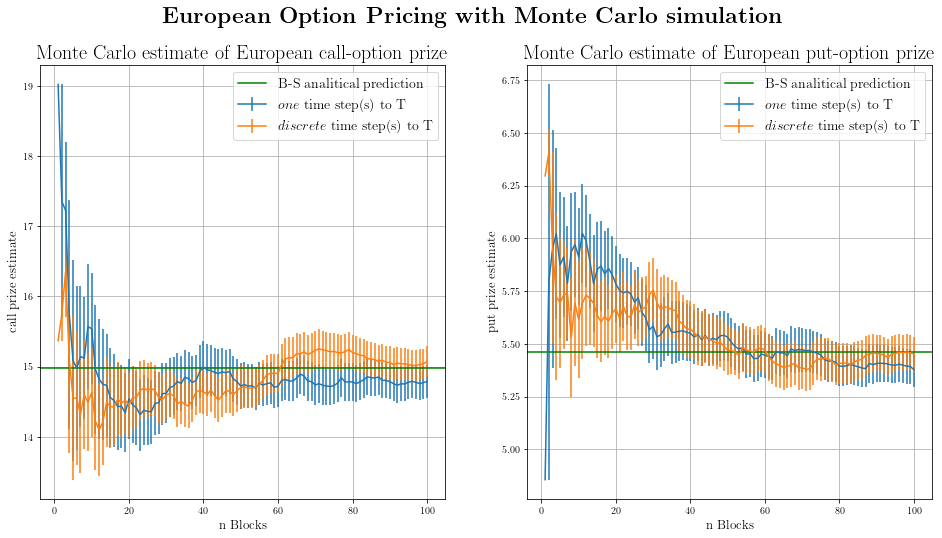

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle(r"\textbf{European Option Pricing with Monte Carlo simulation}", fontsize='23', weight='bold')

ax1.axhline(y=teo_call, color='g', linestyle='-', label="B-S analitical prediction")
plot_errorbar(ax1, x, teo_call, call_dir , call_dir_err, "call", "one")
plot_errorbar(ax1, x, teo_call, call_dis , call_dis_err, "call", "discrete")

ax2.axhline(y=teo_put, color='g', linestyle='-', label="B-S analitical prediction")
plot_errorbar(ax2, x, teo_put, put_dir, put_dir_err, "put", "one")
plot_errorbar(ax2, x, teo_put, put_dis, put_dis_err, "put", "discrete")